""" 2.1. Problem Statement: Numpy Problem Statement 1: Write a function so that the columns of the output matrix are powers of the input vector. 
The order of the powers is determined by the increasing boolean argument. 
Specifically, when increasing is False, the i-th output column is the input vector raised element-wise to the power of N - i - 1.
HINT: Such a matrix with a geometric progression in each row is named for Alexandre-Theophile Vandermonde. """

In [1]:
import numpy as np
new_array = np.arange(1, 5)
def Matrix(onedarray, column_count, increase = False):
    if not increase:
        x = range(column_count)
    else:
        x = range(column_count-1, -1, -1)
    return np.column_stack([new_array**(column_count-1-i) for i in x])

Matrix(new_array, 5)
Matrix(new_array, 5, True)

array([[  1,   1,   1,   1,   1],
       [  1,   2,   4,   8,  16],
       [  1,   3,   9,  27,  81],
       [  1,   4,  16,  64, 256]], dtype=int32)

Problem Statement 2: Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average of the given sequence is defined as follows: The moving average sequence has n-k+1 elements as shown below. The moving averages with k=4 of a ten-value sequence (n=10) is shown below i 1 2 3 4 5 6 7 8 9 10 ===== == == == == == == == == == == Input 10 20 30 40 50 60 70 80 90 100 y1 25 = (10+20+30+40)/4 y2 35 = (20+30+40+50)/4 y3 45 = (30+40+50+60)/4 y4 55 = (40+50+60+70)/4 y5 65 = (50+60+70+80)/4 y6 75 = (60+70+80+90)/4 y7 85 = (70+80+90+100)/4 Thus, the moving average sequence has n-k+1=10-4+1=7 values. Question: Write a function to find moving average in an array over a window: Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3. """

In [2]:
sequences = [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]
window = 3
new = []
def moving_avg(onedarray, window):
    for i in range(len(sequences)-window+1):
        sum_new = 0
        for x in range(window):
            sum_new = sum_new + sequences[i + x]
        new.append(sum_new/window)
    return new

moving_avg(sequences, 3)

[5.0,
 4.666666666666667,
 5.666666666666667,
 6.666666666666667,
 9.666666666666666,
 28.666666666666668,
 49.333333333333336,
 72.66666666666667,
 84.0,
 93.33333333333333,
 116.33333333333333]

In [ ]:
""" 2.2. Problem Statement: Pandas Problem Statement 1: 1) How-to-count-distance-to-the-previous-zero For each value, 
count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) 
and if there are no previous zeros, print the position Consider a DataFrame df where there is an integer column 
{'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]} The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. 
Make this a new column 'Y'. import pandas as pd df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}) """

In [3]:
import pandas as pd
data_frame = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}) 

a = list(data_frame.X)
y = []
i = 0
for ele in a:
    if ele != 0:
        i+=1
    else:
        i=0
    y.append(i)
y
data_frame['Y'] = y
data_frame

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


In [ ]:
"""
2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers.
"""

In [4]:
df = pd.DatetimeIndex(start = "1/1/2015", end = '31/12/2015', freq = 'D')
dfdate = pd.Series(df)
dfweekdays = pd.Series(df.weekday)
data = {'date' : dfdate, 
        'weekdays':dfweekdays}
df = pd.DataFrame(data, columns = ['date', 'weekdays'])

df = df[df['weekdays'] < 5]

randomnumbers = np.random.randint(0, 1000, len(df))

df['randomnumbers'] = randomnumbers
df['randomnumbers']

C:\Users\kupadhyay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


0      614
1      442
4      738
5      541
6      959
7      784
8      519
11     127
12     449
13     353
14     873
15     152
18     899
19     106
20     962
21     991
22     759
25      63
26     945
27     286
28     280
29     518
32     116
33     307
34     187
35     356
36     682
39      69
40     122
41     594
      ... 
323    842
326     75
327    909
328    830
329     78
330    992
333    549
334    921
335    878
336    425
337     14
340    970
341    711
342     69
343    641
344    875
347    701
348    110
349    698
350    298
351    495
354    800
355    940
356    440
357    980
358    821
361    760
362    662
363    812
364    802
Name: randomnumbers, Length: 261, dtype: int32

In [ ]:
"""
3) Find the sum of the values in s for every Wednesday
"""

In [5]:
df.loc[df['weekdays'] == 2, 'randomnumbers'].sum()

28255

In [ ]:
"""
4) Average For each calendar month
"""

In [7]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['randomnumbers'].groupby(by = df['month']).mean()

month
1     561.818182
2     416.100000
3     464.000000
4     445.636364
5     412.095238
6     562.454545
7     414.043478
8     602.714286
9     522.681818
10    515.954545
11    586.571429
12    644.478261
Name: randomnumbers, dtype: float64

In [ ]:
"""
5) For each group of four consecutive calendar months in s, find the date on which the highest value occurred.
"""

In [8]:
df['quarter'] = pd.DatetimeIndex(df['date']).quarter
df['randomnumbers'].groupby(by = df['quarter']).max()

quarter
1    991
2    962
3    995
4    992
Name: randomnumbers, dtype: int32

In [ ]:
""" Problem Statement 2: Read the dataset from the below link 
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv Questions: """

In [ ]:
""""
1) Delete unnamed columns
"""

In [9]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")
df = df.drop(df.columns[0],  axis = 1)
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

In [ ]:
"""
2) Show the distribution of male and female
"""

In [10]:
df['Count'].groupby(by = df['Gender']).mean()

Gender
F    29.310925
M    41.615650
Name: Count, dtype: float64

In [ ]:
"""
3) Show the top 5 most preferred names
"""

In [11]:
df['Name'].value_counts()[:5].index.tolist()

['Riley', 'Avery', 'Jordan', 'Peyton', 'Hayden']

In [ ]:
"""
4) What is the median name occurrence in the dataset
"""

In [12]:
k_median = df['Name'].groupby(df['Name']).count().median()
r = df['Name'].groupby(df['Name']).count().to_dict()
m = []
for key, values in r.items():
    if values == k_median:
        m.append(key)
print(m)
len(m)

['Abubakar', 'Adelie', 'Adira', 'Adylene', 'Aerial', 'Aidric', 'Akari', 'Alaiya', 'Alara', 'Alazay', 'Alder', 'Aleana', 'Aleksey', 'Alin', 'Alliana', 'Alon', 'Alyn', 'Alysse', 'Amaryllis', 'Ambree', 'Ameir', 'Amer', 'Amyri', 'Andrae', 'Andriana', 'Anely', 'Annahi', 'Annel', 'Anshul', 'Anthoni', 'Anyiah', 'Aran', 'Aristeo', 'Armonie', 'Arsema', 'Artur', 'Arwa', 'Athalia', 'Atley', 'Audrinna', 'Audryna', 'Augusto', 'Auriana', 'Avree', 'Ayannah', 'Ayumi', 'Azaleah', 'Azan', 'Aziah', 'Azlyn', 'Azure', 'Baily', 'Baleria', 'Bea', 'Bellah', 'Bentleigh', 'Berlynn', 'Blakelyn', 'Braidyn', 'Brevin', 'Breydon', 'Briyana', 'Camiya', 'Candelario', 'Caydon', 'Cecile', 'Cezar', 'Chani', 'Chastelyn', 'Chazz', 'Che', 'Chrissy', 'Clarity', 'Codey', 'Cordero', 'Crista', 'Curran', 'Cylas', 'Cypress', 'Dagan', 'Daleysa', 'Dalyn', 'Daphnie', 'Darling', 'Darvin', 'Dashel', 'Dayonna', 'Denisha', 'Deseray', 'Dillinger', 'Dominika', 'Dua', 'Edgard', 'Ediel', 'Eesa', 'Egan', 'Eladio', 'Eliab', 'Elianah', 'Eliora

360

In [ ]:
"""
5) Distribution of male and female born count by states
"""

In [13]:
df.groupby(['Gender', 'State'])['Count'].sum()

Gender  State
F       AK         26250
        AL        215308
        AR        129712
        AZ        368567
        CA       2414063
        CO        260805
        CT        141350
        DC         35276
        DE         31312
        FL        915422
        GA        549637
        HI         37279
        IA        144764
        ID         72808
        IL        695312
        IN        344962
        KS        147216
        KY        210201
        LA        221859
        MA        294236
        MD        269915
        ME         43718
        MI        480990
        MN        276884
        MO        307848
        MS        127343
        MT         31622
        NC        501151
        ND         30054
        NE         88998
                  ...   
M       ME         55650
        MI        557090
        MN        318917
        MO        364924
        MS        160800
        MT         44143
        NC        577529
        ND         39507
        NE 

In [ ]:
"""
2.3. Problem Statement: Use Cases on Numpy and Pandas
1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception
handling using try-catch which gives the output as:
Output:
1) If the List element is a alphabet or string, the output will be
The entry is a
Oops! <class 'ValueError'> occured.
Next entry.
2) If the List element is “0”,the output will be
The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.
3) If the List element is and integer except 0,then output will be:
The entry is 2
The reciprocal of 2 is 0.5 // reciprocal of an integer
"""

In [15]:
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!",sys.exc_info()[0],"occured.")
        print("Next entry.")
        print()
print("The reciprocal of",entry,"is",r)

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


In [ ]:
"""
2) Array out of Bound Exception
Write a Python program to give exception “Array Out of Bound” if the user wants to access the
elements beyond the list size (use try and except)
"""

In [16]:
listnumber = [1,2]
try:
    for l in range(1, 5):
        print(listnumber[l])
except Exception as e:
    print(type(e), "Array Out of Bound")

2
<class 'IndexError'> Array Out of Bound


In [ ]:
"""
3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py.
Note : The module created as fibo.py has to be placed in lib folder
For linux/ubuntu path = /home/anaconda/lib/python3 For Windows path = C:\Users\Ajit\Anaconda3\Lib
"""

In [17]:
import fibo
fibo.fib2()

ModuleNotFoundError: No module named 'fibo'

In [ ]:
"""
4) Write a python module script that contains ispalindrome() method to calculate the input string as palindrome string or not and save it as palindrome.py.
"""

In [16]:
import palindrome
ispalindrome("abcdecba") 

ModuleNotFoundError: No module named 'palindrome'

Note: For above two solution python functions are attached in git directly.

In [ ]:
"""
5) Write a program in Python with one class called Cipher. 
Within the constructor of this class, ask user for a string and store it. 
Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive. 
Implement two methods, encrypt and decrypt within this class. 
Encrypt generates and prints a cipher text using the user-entered string and the key and ecrypt generates decrypted string from ciphertext. 
The cipher only encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted. 
The cipher text can have special characters. 
Use generator expression to filter out alpha and numeric characters of the input string and to generate cipher text. 
Create an instance of this class, encrypt and decrypt back the user entered string.
"""

In [18]:
#A python program to illustrate Caesar Cipher Technique 
def encrypt(text,s): 
    result = "" 
  
    # traverse text 
    for i in range(len(text)): 
        char = text[i] 
  
        # Encrypt uppercase characters 
        if (char.isupper()): 
            result += chr((ord(char) + s-65) % 26 + 65) 
  
        # Encrypt lowercase characters 
        else: 
            result += chr((ord(char) + s - 97) % 26 + 97) 
  
    return result

def decrypt(text,s): 
    result = "" 
  
    # traverse text 
    for i in range(len(text)): 
        char = text[i] 
  
        # Encrypt uppercase characters 
        if (char.isupper()): 
            result += chr((ord(char) + s+63) % 26 + 65) 
  
        # Encrypt lowercase characters 
        else: 
            result += chr((ord(char) + s + 95) % 26 + 97) 
  
    return result 
#check the above function 
text = "ATTACKATONCE"
s = 40
encrypt(text, s)

'OHHOQYOHCBQS'

In [19]:
decrypt("OHHOQYOHCBQS", s)

'ATTACKATONCE'

In [ ]:
""" 6) Get Data from the following link: http://files.grouplens.org/datasets/movielens/ml-20m.zip 
We will be using the following files for this exercise: ratings.csv : userId,movieId,rating, timestamp tags.csv 
: userId,movieId, tag, timestamp movies.csv : movieId, title, genres """

In [20]:
#I. Read the dataset using pandas.
import pandas as pd
df_ratings = pd.read_csv(r"D:\Acadgild\Data\ml-20m\ratings.csv")
df_tags = pd.read_csv(r"D:\Acadgild\Data\ml-20m\tags.csv")
df_movies = pd.read_csv(r"D:\Acadgild\Data\ml-20m\movies.csv")

In [21]:
#II. Extract the first row from tags and print its type.
df_tags.iloc[0]
print(df_tags.dtypes)

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object


In [22]:
#III. Extract row 0, 11, 2000 from tags DataFrame.
extract_row = [0, 11, 2000]
for i in extract_row:
    print(df_tags.iloc[i])

userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object
userId                  65
movieId               1783
tag          noir thriller
timestamp       1368149983
Name: 11, dtype: object
userId                     910
movieId                  68554
tag          conspiracy theory
timestamp           1368043943
Name: 2000, dtype: object


In [23]:
#IV. Print index, columns of the DataFrame.
print(df_tags.index)
print(df_tags.columns)

RangeIndex(start=0, stop=465564, step=1)
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [24]:
#V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().
print(df_ratings['rating'].mean())
print(df_ratings['rating'].median())
print(df_ratings['rating'].std())
print(df_ratings['rating'].min())
print(df_ratings['rating'].max())

print(df_ratings['rating'].describe())

3.5255285642993797
3.5
1.051988919275684
0.5
5.0
count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [25]:
#VI. Filter out ratings with rating > 5

df_ratings.loc[df_ratings['rating'] > 5]

,userId,movieId,rating,timestamp


In [26]:
#VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified.
df_ratings.isnull().sum()

df_tags.isnull().sum()

df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [27]:
#VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.
df_movies[df_movies['genres'] == 'Animation']

,movieId,title,genres
2503,2588,Cloudland (1998),Animation
4906,5002,Fritz the Cat (1972),Animation
4907,5003,"Nine Lives of Fritz the Cat, The (1974)",Animation
9455,27738,"Cathedral, The (Katedra) (2002)",Animation
9989,32840,Vincent (1982),Animation
13444,66335,Afro Samurai: Resurrection (2009),Animation
13858,69469,Garfield's Pet Force (2009),Animation
14184,71158,Immigrants (L.A. Dolce Vita) (2008),Animation
14492,72603,Merry Madagascar (2009),Animation
14578,72927,Donkey Xote (2007),Animation


In [28]:
#IX. Find the average rating of movies.
df_ratings.groupby(by = 'movieId')['rating'].mean()

movieId
1         3.921240
2         3.211977
3         3.151040
4         2.861393
5         3.064592
6         3.834930
7         3.366484
8         3.142049
9         3.004924
10        3.430029
11        3.667713
12        2.619766
13        3.272416
14        3.432082
15        2.721993
16        3.787455
17        3.968573
18        3.373631
19        2.607412
20        2.880754
21        3.581689
22        3.319400
23        3.148235
24        3.199849
25        3.689510
26        3.628857
27        3.413520
28        4.057546
29        3.952230
30        3.633880
            ...   
131146    4.000000
131148    4.000000
131150    4.000000
131152    0.500000
131154    3.500000
131156    4.000000
131158    4.000000
131160    4.000000
131162    2.000000
131164    4.000000
131166    4.000000
131168    3.500000
131170    3.500000
131172    1.000000
131174    3.500000
131176    4.500000
131180    2.500000
131231    3.500000
131237    3.000000
131239    4.000000
131241    4.000000
1312

In [29]:
#X. Perform an inner join of movies and tags based on movieId.
result = pd.merge(df_movies, df_tags, how = 'inner', on = 'movieId')

type(result)
result.columns

Index(['movieId', 'title', 'genres', 'userId', 'tag', 'timestamp'], dtype='object')

In [30]:
#XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.
result = pd.merge(df_movies, df_ratings, on = 'movieId')
result.columns
df_movies.columns
df_ratings.columns
df_tags.columns
result['movieId']
result_head = result[(result['genres'].isin(['Comedy'])) & (result['rating'] > 4)].head()
result_head['title']

87435    Father of the Bride Part II (1995)
87437    Father of the Bride Part II (1995)
87455    Father of the Bride Part II (1995)
87460    Father of the Bride Part II (1995)
87462    Father of the Bride Part II (1995)
Name: title, dtype: object

In [31]:
#XII. Split 'genres' into multiple columns.
df_movies['genres'].str.split("|", expand = True)

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [32]:
#XIII. Extract year from title e.g. (1995).
def splitname_year(x):
    start_index = x.find("(")
    end_index = x.find(')')
    return x[0 : start_index : 1]

df_movies['title'] = df_movies['title'].apply(splitname_year)
df_movies['title']

0                                              Toy Story 
1                                                Jumanji 
2                                       Grumpier Old Men 
3                                      Waiting to Exhale 
4                            Father of the Bride Part II 
5                                                   Heat 
6                                                Sabrina 
7                                           Tom and Huck 
8                                           Sudden Death 
9                                              GoldenEye 
10                               American President, The 
11                           Dracula: Dead and Loving It 
12                                                 Balto 
13                                                 Nixon 
14                                      Cutthroat Island 
15                                                Casino 
16                                 Sense and Sensibility 
17            

In [33]:
#XIV. Select rows based on timestamps later than 2015-02-01.
from datetime import datetime
given_date = datetime(2015, 2, 1)
def datetimestamp(x):
    row_date = datetime.fromtimestamp(x)
    return given_date < row_date

df_tags.loc[df_tags['timestamp'].apply(datetimestamp) == True]

,userId,movieId,tag,timestamp
301,318,260,1970s,1424472169
302,318,260,fantasy,1424472169
303,318,260,sci-fi,1424472169
304,318,115149,Action,1424534310
305,318,115149,Revenge,1424534283
306,318,115149,Willem Dafoe,1424534383
324,342,318,masterplan,1423424898
326,342,318,prison escape,1423424898
327,342,318,redemption,1423424898
492,342,54372,French,1422734628


In [34]:
#XV. Sort the tags DataFrame based on timestamp.
df_tags.sort_values(by = ['timestamp'])

,userId,movieId,tag,timestamp
333932,100371,2788,monty python,1135429210
333927,100371,1732,coen brothers,1135429236
333924,100371,1206,stanley kubrick,1135429248
333923,100371,1193,jack nicholson,1135429371
333939,100371,5004,peter sellers,1135429399
333922,100371,47,morgan freeman,1135429412
333921,100371,47,brad pitt,1135429412
333936,100371,4011,brad pitt,1135429431
333937,100371,4011,guy ritchie,1135429431
333920,100371,32,bruce willis,1135429442


In [ ]:
""" 2.4. Problem Statement: Matplotlib Matplotlib: This assignment is for visualization using matplotlib: data to use: 
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv titanic = pd.read_csv(url) Charts to plot: """

([<matplotlib.patches.Wedge at 0x1a5ae26b240>,
 [Text(-0.480837,0.989341,'Male'), Text(0.480837,-0.989341,'Female')],
 [Text(-0.262275,0.539641,'64.4%'), Text(0.262275,-0.539641,'35.6%')])

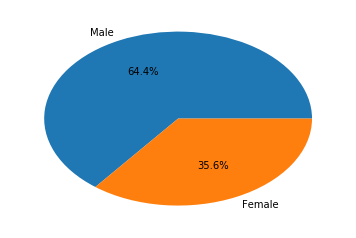

In [35]:
#1. Create a pie chart presenting the male/female proportion
%matplotlib inline
import pandas as pd
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

titanic.sex = titanic.sex.dropna()

size = titanic.groupby(['sex']).size()
male_prop = size[1]/(size[0]+size[1]) 
female_prop = size[0]/(size[0]+size[1])

prop = [male_prop, female_prop]
import matplotlib.pyplot as plt
plt.pie(prop, autopct = '%1.1f%%', labels = ['Male', 'Female'])

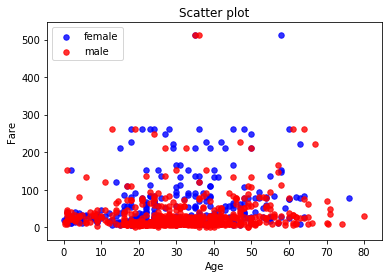

In [36]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df_titanic_b_sex = titanic.groupby(by = ('sex'))
ax.scatter(df_titanic_b_sex.get_group('female').age, df_titanic_b_sex.get_group('female').fare, alpha = 0.8, c = 'blue', s = 30, label = 'female')
ax.scatter(df_titanic_b_sex.get_group('male').age, df_titanic_b_sex.get_group('male').fare, alpha = 0.8, c = 'red', s = 30, label = 'male')
plt.title("Scatter plot")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(loc = 2)
plt.show()

In [ ]:
""" 2.5. Problem Statement: Data Cleaning It happens all the time: someone gives you data containing malformed 
strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis? 
Take this monstrosity as the DataFrame to use in the following puzzles: 
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'], 
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
'Airline': ['KLM(!)', ' (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']}) """

In [37]:
#1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

df.FlightNumber

flight_num = pd.Series(df.FlightNumber)
flight_list = flight_num.tolist()
for n in range(len(flight_list)):
    if pd.isna(flight_list[n]):
        flight_list[n] = flight_list[n - 1] + 10

df.FlightNumber = pd.Series(flight_list)
df.dtypes
df.FlightNumber = df.FlightNumber.astype(int)
df.dtypes
print(df.FlightNumber)

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int32


In [39]:
#2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.
#temporary dataframe
#temp_df = df
df_temp = pd.DataFrame()
df_temp = df_temp.fillna(0) # with 0s rather than NaNs
temp = df.From_To.str.split('_', expand = True)
df_temp['From'] = temp[0]
df_temp['To'] = temp[1]
#print(df)
df_temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [40]:
#3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)
df_temp['From'] = df_temp['From'].apply(lambda x : str(x).capitalize())
df_temp['To'] = df_temp['To'].apply(lambda x : str(x).capitalize())
print(df_temp)

       From         To
0    London      Paris
1    Madrid      Milan
2    London  Stockholm
3  Budapest      Paris
4  Brussels     London


In [41]:
#4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.
print(df.columns)
df = df.drop(columns = ['From_To'])
df['From'] = df_temp['From']
df['To'] = df_temp['To']
df

Index(['From_To', 'FlightNumber', 'RecentDelays', 'Airline'], dtype='object')


,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [42]:
#5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.
#Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.
delays = df['RecentDelays'].apply(pd.Series)
delays = delays.rename(columns = lambda x : 'delay_' + str(x))
df = df.drop(columns = 'RecentDelays')
df.join(delays)

,FlightNumber,Airline,From,To,delay_0,delay_1,delay_2
0,10045,KLM(!),London,Paris,23.0,47.0,NaN
1,10055,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,"""Swiss Air""",Brussels,London,67.0,32.0,NaN


In [ ]:
""" 2.6. Problem Statement: Pandas SQL Problem statement 
1: Read the following data set: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/ 
Rename the columns as per the description from this file: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

Task: Create a sql db from adult dataset and name it sqladb """

In [43]:
import pandas as pd
dataurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "Income"]
df_adult = pd.read_csv(dataurl, header = None, skipinitialspace = True)
df_adult.columns = columns
df_adult.education
import sqlite3
from pandasql import sqldf

pysqldf = lambda q : sqldf(q, globals())
#1. Select 10 records from the adult sqladb
q = "Select * from df_adult limit 10"
pysqldf(q)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [44]:
#2. Show me the average hours per week of all men who are working in private sector
q = """Select avg(hours_per_week) from df_adult where workclass = 'Private' AND sex = 'Male';"""
pysqldf(q)

,avg(hours_per_week)
0,42.221226


In [45]:
#3. Show me the frequency table for education, occupation and relationship, separately
q = """Select education, COUNT(education) as frequency from df_adult group by education order by COUNT(education)"""
pysqldf(q)

,education,frequency
0,Preschool,51
1,1st-4th,168
2,5th-6th,333
3,Doctorate,413
4,12th,433
5,9th,514
6,Prof-school,576
7,7th-8th,646
8,10th,933
9,Assoc-acdm,1067


In [46]:
q = """Select occupation, COUNT(occupation) as frequency from df_adult group by occupation order by COUNT(occupation)"""
pysqldf(q)

,occupation,frequency
0,Armed-Forces,9
1,Priv-house-serv,149
2,Protective-serv,649
3,Tech-support,928
4,Farming-fishing,994
5,Handlers-cleaners,1370
6,Transport-moving,1597
7,?,1843
8,Machine-op-inspct,2002
9,Other-service,3295


In [47]:
q = """Select relationship, COUNT(relationship) as frequency from df_adult group by relationship order by COUNT(relationship)"""
pysqldf(q)

,relationship,frequency
0,Other-relative,981
1,Wife,1568
2,Unmarried,3446
3,Own-child,5068
4,Not-in-family,8305
5,Husband,13193


In [48]:
#4. Are there any people who are married, working in private sector and having a master’s degree
q = """Select * from df_adult where df_adult.workclass = 'Private' AND df_adult.education = 'Masters' AND NOT(df_adult.relationship = 'Unmarried')"""
pysqldf(q)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
1,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
2,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
3,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
4,31,Private,99928,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,<=50K
5,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States,>50K
6,26,Private,397317,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,1876,40,United-States,<=50K
7,34,Private,142897,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,7298,0,35,Taiwan,>50K
8,49,Private,71195,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States,<=50K
9,62,Private,270092,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K


In [49]:
#5. What is the average, minimum and maximum age group for people working in different sectors
q = """Select occupation, avg(age), min(age), max(age) from df_adult group by occupation"""
pysqldf(q)

,occupation,avg(age),min(age),max(age)
0,?,40.882800,17,90
1,Adm-clerical,36.964456,17,90
2,Armed-Forces,30.222222,23,46
3,Craft-repair,39.031471,17,90
4,Exec-managerial,42.169208,17,90
5,Farming-fishing,41.211268,17,90
6,Handlers-cleaners,32.165693,17,90
7,Machine-op-inspct,37.715285,17,90
8,Other-service,34.949621,17,90
9,Priv-house-serv,41.724832,17,81


In [50]:
#6. Calculate age distribution by country
q = """Select max(age), min(age), max(age)-min(age) as age_range, native_country from df_adult group by native_country"""
pysqldf(q)

,max(age),min(age),age_range,native_country
0,90,17,73,?
1,65,18,47,Cambodia
2,80,17,63,Canada
3,75,22,53,China
4,75,18,57,Columbia
5,82,21,61,Cuba
6,78,18,60,Dominican-Republic
7,90,21,69,Ecuador
8,79,17,62,El-Salvador
9,90,17,73,England


In [51]:
#7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capitalgain' and 'capital-loss'
q = """Select capital_gain, capital_loss, capital_gain - capital_loss as Net_Capital_Gain from df_adult"""
pysqldf(q)

,capital_gain,capital_loss,Net_Capital_Gain
0,2174,0,2174
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,14084,0,14084
9,5178,0,5178


In [ ]:
""" Problem statement 2: Read the following data set: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data Task:

"""

In [52]:
#1. Create an sqlalchemy engine using a sample from the data set
from sqlalchemy import create_engine

engine = create_engine('sqlite://', echo = False)

df_adult.to_sql(name = 'new_adult', con = engine, if_exists = 'replace')
engine.execute("""Select * from new_adult where workclass = '?'""").fetchall()

[(27, 54, '?', 180211, 'Some-college', 10, 'Married-civ-spouse', '?', 'Husband', 'Asian-Pac-Islander', 'Male', 0, 0, 60, 'South', '>50K'),
 (61, 32, '?', 293936, '7th-8th', 4, 'Married-spouse-absent', '?', 'Not-in-family', 'White', 'Male', 0, 0, 40, '?', '<=50K'),
 (69, 25, '?', 200681, 'Some-college', 10, 'Never-married', '?', 'Own-child', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K'),
 (77, 67, '?', 212759, '10th', 6, 'Married-civ-spouse', '?', 'Husband', 'White', 'Male', 0, 0, 2, 'United-States', '<=50K'),
 (106, 17, '?', 304873, '10th', 6, 'Never-married', '?', 'Own-child', 'White', 'Female', 34095, 0, 32, 'United-States', '<=50K'),
 (128, 35, '?', 129305, 'HS-grad', 9, 'Married-civ-spouse', '?', 'Husband', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K'),
 (149, 43, '?', 174662, 'Some-college', 10, 'Divorced', '?', 'Not-in-family', 'White', 'Female', 0, 0, 40, 'United-States', '<=50K'),
 (154, 52, '?', 252903, 'HS-grad', 9, 'Divorced', '?', 'Not-in-family', 'White', 'Ma

In [53]:
engine.execute("""insert into new_adult (age, workclass) values (99, 'Private');""")
engine.execute("""insert into new_adult (age, workclass) values (100, 'Private');""")
engine.execute("""insert into new_adult (age, workclass) values (101, 'Private');""")

In [54]:
#2. Write two basic update queries
engine.execute("""Update new_adult set marital_status = 'Unmarried', sex = 'Male' where age = 99""")
engine.execute("""Update new_adult set education = 'Bachelors' where age = 99""")

In [55]:
#3. Write two delete queries
engine.execute("""insert into new_adult (age, workclass) values (99, 'Private');""")
engine.execute("""insert into new_adult (age, workclass) values (100, 'Private');""")
engine.execute("""insert into new_adult (age, workclass) values (101, 'Private');""")
engine.execute("""Select * from new_adult where age >= 99""").fetchall()

engine.execute("""Delete from new_adult where age = 100 AND workclass = 'Private'""")
engine.execute("""Delete from new_adult where age = 99 AND education IS NULL""")

In [56]:
#4. Write two filter queries
engine.execute("""Select * from new_adult where age < 18""").fetchall()

[(106, 17, '?', 304873, '10th', 6, 'Never-married', '?', 'Own-child', 'White', 'Female', 34095, 0, 32, 'United-States', '<=50K'),
 (209, 17, 'Private', 65368, '11th', 7, 'Never-married', 'Sales', 'Own-child', 'White', 'Female', 0, 0, 12, 'United-States', '<=50K'),
 (262, 17, 'Private', 245918, '11th', 7, 'Never-married', 'Other-service', 'Own-child', 'White', 'Male', 0, 0, 12, 'United-States', '<=50K'),
 (271, 17, 'Private', 191260, '9th', 5, 'Never-married', 'Other-service', 'Own-child', 'White', 'Male', 1055, 0, 24, 'United-States', '<=50K'),
 (335, 17, 'Private', 270942, '5th-6th', 3, 'Never-married', 'Other-service', 'Other-relative', 'White', 'Male', 0, 0, 48, 'Mexico', '<=50K'),
 (371, 17, 'Private', 89821, '11th', 7, 'Never-married', 'Other-service', 'Own-child', 'White', 'Male', 0, 0, 10, 'United-States', '<=50K'),
 (421, 17, 'Private', 175024, '11th', 7, 'Never-married', 'Handlers-cleaners', 'Own-child', 'White', 'Male', 2176, 0, 18, 'United-States', '<=50K'),
 (431, 17, '?', 

In [57]:
engine.execute("""Select * from new_adult where age < 18 AND native_country = 'United-States' AND education = '9th' AND race = 'Black'""").fetchall()

[(1519, 17, 'Local-gov', 32124, '9th', 5, 'Never-married', 'Other-service', 'Own-child', 'Black', 'Male', 0, 0, 9, 'United-States', '<=50K'),
 (5147, 17, '?', 127003, '9th', 5, 'Never-married', '?', 'Own-child', 'Black', 'Male', 0, 0, 40, 'United-States', '<=50K'),
 (16317, 17, 'Private', 133449, '9th', 5, 'Never-married', 'Other-service', 'Own-child', 'Black', 'Male', 0, 0, 26, 'United-States', '<=50K'),
 (17383, 17, 'Private', 225211, '9th', 5, 'Never-married', 'Other-service', 'Own-child', 'Black', 'Male', 0, 0, 35, 'United-States', '<=50K'),
 (25502, 17, 'Private', 317702, '9th', 5, 'Never-married', 'Other-service', 'Own-child', 'Black', 'Female', 0, 0, 40, 'United-States', '<=50K'),
 (26189, 17, 'Private', 230789, '9th', 5, 'Never-married', 'Sales', 'Own-child', 'Black', 'Male', 0, 0, 22, 'United-States', '<=50K'),
 (30666, 17, 'Private', 143868, '9th', 5, 'Never-married', 'Other-service', 'Own-child', 'Black', 'Male', 0, 0, 40, 'United-States', '<=50K')]

In [58]:
#5. Write two function queries
engine.execute("""Select count(*) from new_adult where workclass = 'Private'""").fetchall()

[(22699,)]

In [59]:
engine.execute("""Select sum(capital_gain) from new_adult""").fetchall()

[(35089324,)]